In [8]:
import math
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import from_levels_and_colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [9]:
def abline(slope, intercept, ax):
    """Coordenadas en funcion de ordenada al origen y pendiente"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)




In [10]:
sp500_px = pd.read_csv("../../datasets/sp500_data.csv", index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]

pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
print(loadings)

        XOM       CVX
0  0.664711  0.747101
1  0.747101 -0.664711


Extracto del libro de Peter y Andrew Bruce junto a Peter Gedeck 

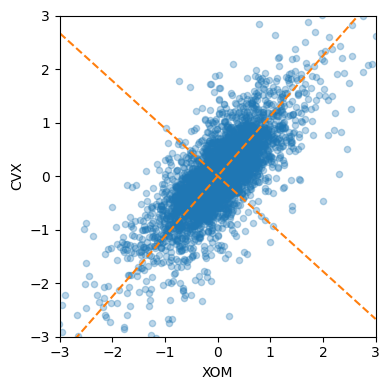

In [11]:
ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
        '--', color='C1')

plt.tight_layout()
plt.show()

Obtengo el valor de las acciones de varias empresas (Argentina y del exterior)

In [12]:
df_acc = pd.read_csv("../../datasets/Merval.csv", index_col=0)
df_acc = df_acc.iloc[2:]
for c in df_acc.columns:
    df_acc[c] = df_acc[c].str.replace('.', '')
    df_acc[c] = df_acc[c].str.replace(',', '.')
    df_acc[c] = df_acc[c].astype(float)

#Elimino nulos
df_acc = df_acc.dropna(how='all')
#['HAVA','MOLI', 'LEDE', "MORI", 'MELI', 'AMZN',  'GOOGL', "ALUA", 'TXAR']
#Me quedo solo con un grupo
df_acc = df_acc[['MELI', 'AMZN',  'GOOGL']]

#Traspongo, ahora los dias son columnas y el nombre es indice
#df = df_acc.transpose()
#Transformo los valores en ratio de crecimiento o descrecimiento del valor de la accion
df_acc.replace(0, np.nan, inplace=True)
df_ratio = df_acc.pct_change(axis=0) 
df_ratio.fillna(0, inplace=True)

/tmp/ipykernel_16483/1852249644.py:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ratio = df_acc.pct_change(axis=0)


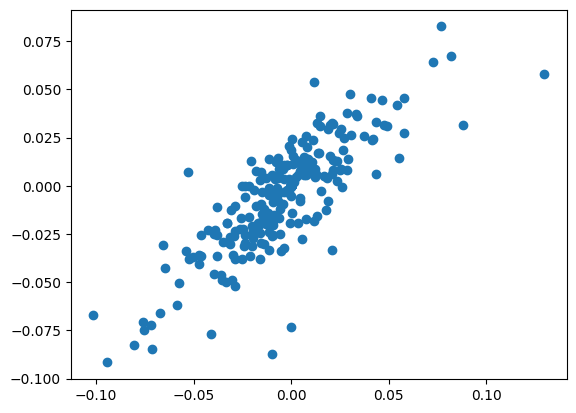

In [6]:
plt.scatter(df_ratio['GOOGL'], df_ratio["AMZN"])
#Un outlier arruina el ejemplo

[0.91306292 0.08693708]
1.0


<BarContainer object of 2 artists>

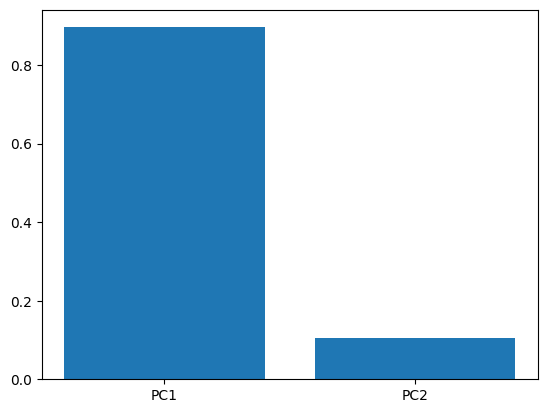

In [7]:
pca = PCA(n_components=2)
pca.fit(df_ratio[['AMZN',  'GOOGL']])
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())
df_var = pd.DataFrame(pcs.explained_variance_ratio_, columns=["var_exp"])
df_var["PC"] = np.arange(1, pcs.n_components_+1,1)
plt.bar(["PC1", "PC2"], df_var["var_exp"], label=["PC1", "PC2"])